In [1]:
from numpy import load
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn import metrics
import numpy as np 
from pandas_ml import ConfusionMatrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot

In [2]:
# load dataset
data = load('face_embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
#print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))

In [3]:
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

# Tune hyperparameters for differnt algorthms to check which one to choose and which  
## we will use grid search for RandomForest, KNN and SVC algorithms 

In [4]:
# example of grid searching key hyperparameters for RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(trainX, trainy)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to 

Best: 0.977072 using {'max_features': 'log2', 'n_estimators': 1000}
0.875955 (0.040072) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.972369 (0.021722) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.975897 (0.017002) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.868313 (0.041966) with: {'max_features': 'log2', 'n_estimators': 10}
0.971193 (0.022608) with: {'max_features': 'log2', 'n_estimators': 100}
0.977072 (0.019696) with: {'max_features': 'log2', 'n_estimators': 1000}


In [5]:
# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(trainX, trainy)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Best: 0.984715 using {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.984715 (0.016076) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.984715 (0.016076) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.975897 (0.019955) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.978248 (0.018614) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.982951 (0.014965) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.982951 (0.014494) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.980012 (0.018915) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.980012 (0.018860) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.978248 (0.022449) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.981188 (0.018712) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.971781 (

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [6]:
# example of grid searching key hyperparametres for SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50,10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(trainX, trainy)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Best: 0.984715 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.971781 (0.025791) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.983539 (0.019238) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.982951 (0.018733) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.971781 (0.025791) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.983539 (0.019238) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.982951 (0.018733) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.970606 (0.026141) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.984127 (0.017372) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.984715 (0.018200) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.419753 (0.039145) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.472075 (0.050218) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.564374 (0.049242) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.040564 (0.004249) with: {'C': 0.01, 'gamma': 'sca

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# The resaults are simmilar and we can achieve up to 94 accuracy using one of them 

# SVC 

In [7]:
svc = SVC(kernel="rbf",gamma='scale',C=50).fit(trainX,trainy)
yhat_train = svc.predict(trainX)
yhat_test = svc.predict(testX)  

# evaluation of SVC

In [8]:
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
report = classification_report(testy, yhat_test)
matrics = confusion_matrix(testy,yhat_test)
print(score_train)
print(score_test)
print(report)

1.0
0.9670781893004116
                       precision    recall  f1-score   support

        Adrian Broody       1.00      1.00      1.00         6
      Adriana Barazza       1.00      1.00      1.00         7
           Ali Latter       1.00      0.75      0.86         4
           Amena Khan       1.00      1.00      1.00         5
      Andrew Lincolen       1.00      1.00      1.00         8
       Angella Basset       1.00      1.00      1.00         7
        Anna_Hathaway       1.00      1.00      1.00         4
      Anthony Hopkins       1.00      1.00      1.00         4
           Aron Judge       1.00      1.00      1.00         7
            Aron Paul       1.00      0.50      0.67         2
      Barabara Palvin       1.00      0.83      0.91         6
     Barbra Streisand       1.00      1.00      1.00         2
         Barry Pepper       1.00      0.83      0.91         6
          Bella Hadid       1.00      1.00      1.00         7
      Beyonce Knowles       1.0

In [9]:
FP = matrics.sum(axis=0) - np.diag(matrics)  
FN = matrics.sum(axis=1) - np.diag(matrics)
TP = np.diag(matrics)
TN = matrics.sum() - (FP + FN + TP)
TPR = TP/(TP+FN)
cm = ConfusionMatrix(testy, yhat_test)
print(sum(FP))
print(sum(FN))
print(sum(TP))
print(sum(TN))
print(sum(TPR)/len(TPR))

8
8
235
9712
0.9591173054587688


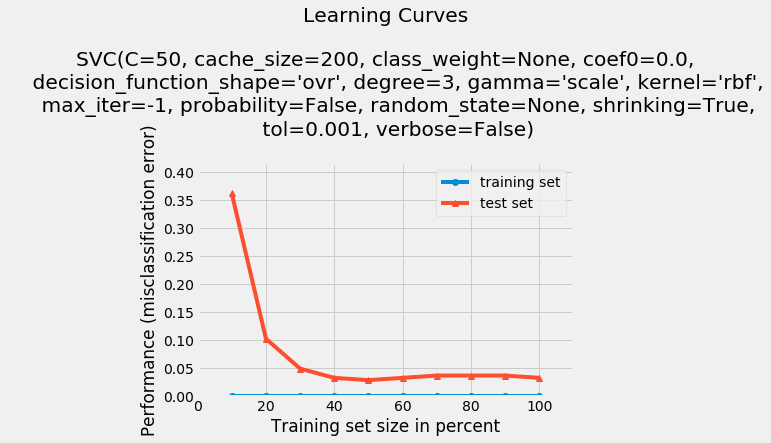

In [23]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from mlxtend.data import iris_data
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
plot_learning_curves(trainX, trainy, testX, testy, svc)
plt.show()

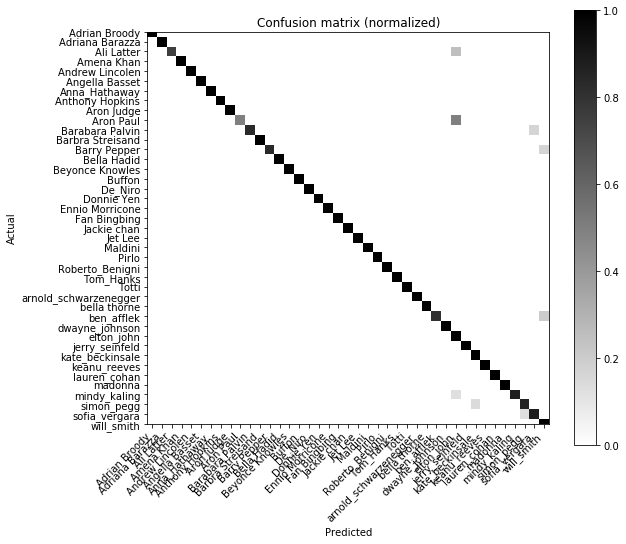

In [10]:
cm.plot(normalized=True)
plt.show()

# KNN classifier 

In [11]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()
neigh.fit(trainX, trainy)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
yhat_train = neigh.predict(trainX)
yhat_test = neigh.predict(testX)  
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
report = classification_report(testy, yhat_test)
matrics = confusion_matrix(testy,yhat_test)
print(report)
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

                       precision    recall  f1-score   support

        Adrian Broody       1.00      1.00      1.00         6
      Adriana Barazza       0.78      1.00      0.88         7
           Ali Latter       1.00      0.75      0.86         4
           Amena Khan       1.00      1.00      1.00         5
      Andrew Lincolen       1.00      1.00      1.00         8
       Angella Basset       1.00      1.00      1.00         7
        Anna_Hathaway       1.00      1.00      1.00         4
      Anthony Hopkins       1.00      1.00      1.00         4
           Aron Judge       1.00      1.00      1.00         7
            Aron Paul       1.00      1.00      1.00         2
      Barabara Palvin       1.00      1.00      1.00         6
     Barbra Streisand       0.67      1.00      0.80         2
         Barry Pepper       0.75      1.00      0.86         6
          Bella Hadid       1.00      1.00      1.00         7
      Beyonce Knowles       1.00      1.00      1.00  

In [14]:
FP = matrics.sum(axis=0) - np.diag(matrics)  
FN = matrics.sum(axis=1) - np.diag(matrics)
TP = np.diag(matrics)
TN = matrics.sum() - (FP + FN + TP)
TPR = TP/(TP+FN)
cm = ConfusionMatrix(testy, yhat_test)
print(sum(FP))
print(sum(FN))
print(sum(TP))
print(sum(TN))
print(sum(TPR)/len(TPR))

6
6
237
9714
0.9763937282229964


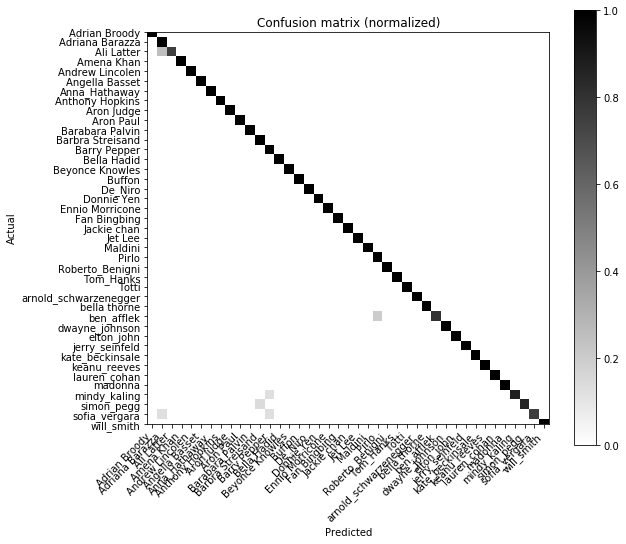

In [15]:
cm.plot(normalized=True)
plt.show()